In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import statistics as stt
from tqdm import tqdm
from os import path
import pandas as pd
import numpy as np
import sys

# Dummy Internal State

In [2]:
episodes = 35000
sec_aV = 0

sec_aV_list = []
sec_bonus = True

discount = 0.000133333333333

for i in range(episodes):
    if sec_aV < 1 and sec_bonus == True and i < 30000:
        sec_aV += discount
        sec_aV_list.append(sec_aV)
        
    elif sec_aV > 0 and sec_bonus == False and i < 30000:
        sec_aV -= discount
        sec_aV_list.append(sec_aV)
    elif i >15000 and i < 30000:
        sec_aV = 0
        sec_aV_list.append(sec_aV)
    elif i >= 30000:
        sec_aV_list.append(0)
    else:
        sec_bonus = False
        sec_aV_list.append(sec_aV)
        
print('Dummy security input created')

Dummy security input created


In [3]:
aro_aV = 0

aro_aV_list = []
aro_bonus = True

discount = 0.000133333333333

for i in range(episodes):
    if i < 15000:
        aro_aV = 0
        aro_aV_list.append(aro_aV)
    elif i >= 15000 and aro_aV < 1 and aro_bonus == True and i <= 30000:
        
        aro_aV +=discount
        aro_aV_list.append(aro_aV)
    elif aro_aV > 0 and aro_bonus == False  and i <= 30000:
        aro_aV -=discount
        aro_aV_list.append(aro_aV)
    elif i >= 30000:
        aro_aV_list.append(0)
    else:
        aro_bonus = False
        aro_aV_list.append(aro_aV)

print('Dummy arousal input created')

Dummy arousal input created


In [4]:
temp_aV = 0

temp_aV_list = []
temp_bonus = True

for i in range(episodes):
    if temp_aV<1:
        temp_aV += 0.00002
        temp_aV_list.append(temp_aV)
    else:
        temp_aV_list.append(1)
        
print('Dummy temperature input created')

Dummy temperature input created


In [5]:
thirst_aV = 0.7

thirst_aV_list = []
thirst_bonus = True

for i in range(episodes):
    if thirst_aV>0:
        thirst_aV -= 0.00002
        thirst_aV_list.append(thirst_aV)
    else:
        thirst_aV_list.append(0)
        
print('Dummy thirst input created')

Dummy thirst input created


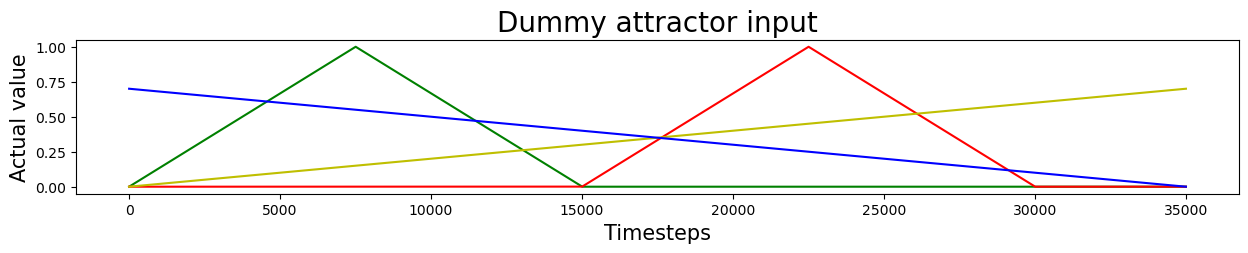

In [6]:
plt.figure(figsize=(15, 2))
plt.plot(sec_aV_list,'g')
plt.plot(aro_aV_list,'r')
plt.plot(temp_aV_list,'y')
plt.plot(thirst_aV_list,'b')
plt.title('Dummy attractor input', fontsize=20)
plt.ylabel('Actual value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.show()

# Multi-attractor class

In [7]:
class Attractor(object):

    def __init__(self):

        '''
        PARAMETERS
        '''

        self.dt = 0.001

        # couplings
        self.we = 5 #self-exitation
        self.wsi = 4
        self.wmi = 4

        self.q = 0.5  # ACh level (0 corresponds to shared inhibition and 1 to mutual inhibition) Competition level - 0.2

        '''# external inputs
        self.I1 = -100
        self.I2 = -100'''

        # Initial state
        self.U = []

        # Initial 'dummy' variance
        self.var = 50   #noise - 50

        #time decay constants
        self.tau = 0.02

        # activation function
        self.a = 1/22
        self.thr = 15
        self.fmax = 40       


    def sigmoid(self, x):
        return self.fmax / (1 + np.exp(-self.a * (x - self.thr)))

    # this function returns the right hand side of the modified Wilson-Cowan equation
    def WilsonCowan(self, input_list):
        
        y_list = []
        
        for i in range(len(input_list)):
            I = input_list[i]
            wU = self.we * self.U[i]
            inh1 = self.q * self.wmi* (sum(self.U)-self.U[i])
            inh2 = (1-self.q) * self.wsi * self.sigmoid(sum(self.U))
            noise = np.random.normal(0,1*self.var)
            
            y_list.append((-self.U[i] + self.sigmoid(wU - inh1 - inh2 + I) + noise)/self.tau)
        
        
        return np.array(y_list)

    def advance(self, *input_list):
        
        if self.U == []:
            self.U = [0]* len(input_list)
        
        y = self.WilsonCowan(input_list)
        
        for i in range(len(input_list)):
            self.U[i] += y[i]*self.dt
            self.U[i] *= self.U[i]>0
        

        return self.U

# Simulation class

In [8]:
q_cond = [.5]
var_cond = [50]
dataset =[]
out_aro_list = []
out_sec_list = []
out_temp_list = []
out_thirst_list = []

class agent():
    def __init__(self):
        self.attractor = Attractor()
        self.sec_aV = sec_aV_list
        self.aro_aV = aro_aV_list
        self.temp_aV = temp_aV_list
        self.thirst_aV = thirst_aV_list
        
    def attractor_dynamics(self,index):
        global out_aro_list, out_sec_list, out_temp_list, out_thirst_list

        out_sec, out_aro, out_temp, out_thirst = self.attractor.advance(self.sec_aV[index]*60, self.aro_aV[index]*60
                                                                        , self.temp_aV[index]*60, self.thirst_aV[index]*60)
        out_aro_list.append(out_aro)
        out_sec_list.append(out_sec)
        out_temp_list.append(out_temp)
        out_thirst_list.append(out_thirst)
        
    def run(self):
        global out_aro_list, out_sec_list, out_temp_list, out_thirst_list
        for i in range(len(q_cond)):
            self.attractor.q = q_cond[i]
            
            for j in range(len(var_cond)):
                self.attractor.var = var_cond[j]
                print("CONDITION Q = " + str(q_cond[i]))
                print("CONDITION VAR = " + str(var_cond[j]))
                
                
                out_aro_list=[]
                out_sec_list=[]
                out_temp_list=[]
                out_thirst_list=[]
                for n in range(len(aro_aV_list)):
                    self.attractor_dynamics(n)

                dataset.append([q_cond[i] , var_cond[j], "Arousal", aro_aV_list, out_aro_list])
                dataset.append([q_cond[i] , var_cond[j], "Security", sec_aV_list, out_sec_list])
                dataset.append([q_cond[i] , var_cond[j], "Temperature", temp_aV_list, out_temp_list])                
                dataset.append([q_cond[i] , var_cond[j], "Thirst", thirst_aV_list, out_thirst_list])

In [9]:
allo = agent()

if __name__ == '__main__':
    try:
        allo.run()
    except KeyboardInterrupt:
        print('Simulation interrupted')

CONDITION Q = 0.5
CONDITION VAR = 50


# Data analysis

In [10]:
df = pd.DataFrame(dataset, columns = ['Q', 'Var', 'Drive', 'Input', 'Output'])
df

Q  Var        Drive                                              Input  \
0  0.5   50      Arousal  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  0.5   50     Security  [0.000133333333333, 0.000266666666666, 0.00039...   
2  0.5   50  Temperature  [2e-05, 4e-05, 6.000000000000001e-05, 8e-05, 0...   
3  0.5   50       Thirst  [0.6999799999999999, 0.6999599999999999, 0.699...   

                                              Output  
0  [2.4265503534211383, 2.180977298100862, 3.5400...  
1  [1.8556457438246439, 2.7802440676420583, 5.632...  
2  [-0.0, 1.347614210895615, -0.0, -0.0, -0.0, -0...  
3  [0.48970136915763907, 2.130577930821711, 2.903...

In [11]:
rslt_df = df[(df['Q'] == 0.5) &
             (df['Var'] == 50)]

inputs = rslt_df['Input'].to_list()
outputs = rslt_df['Output'].to_list()

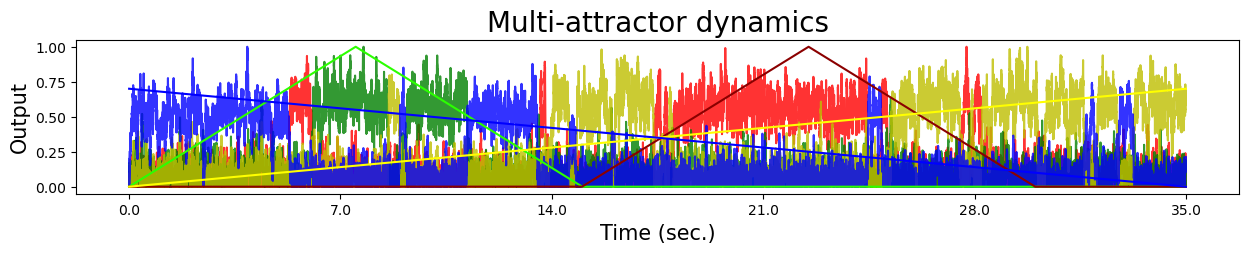

In [15]:
plt.figure(figsize=(15, 2))
#Outputs
plt.plot(outputs[0]/max(outputs[0]),'r', alpha=0.8)
plt.plot(outputs[1]/max(outputs[1]),'g', alpha=0.8)
plt.plot(outputs[2]/max(outputs[2]),'y', alpha=0.8)
plt.plot(outputs[3]/max(outputs[3]),'b', alpha=0.8)

#Inputs
plt.plot(np.array(sec_aV_list),'#2bff00')
plt.plot(np.array(aro_aV_list),'darkred')
plt.plot(np.array(temp_aV_list),'yellow')
plt.plot(np.array(thirst_aV_list),'blue')

ticks = [0, episodes/5, (episodes/5)*2, (episodes/5)*3, (episodes/5)*4, episodes]
dt = 0.001
labels = [x * dt for x in ticks]
plt.xticks(ticks, labels)

plt.title('Multi-attractor dynamics', fontsize=20)
plt.ylabel('Output', fontsize=15)
plt.xlabel('Time (sec.)', fontsize=15)
plt.show()